# Career Navigation with LinkedIn Job Posting Insights
---

## Team Members: Alex Archer
## Questions to be Answered: 
**Based on your Industry...**
- In what regions and cities are jobs booming?
- What are the best skill sets to have?
- Which skills are in high demand?

## Data Set: 1.3 M Linkedin Jobs & Skills (2024)
- **URL:** https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024?select=linkedin_job_postings.csv
---
<br><br>

# 03/18 - 03/25 - Begin data collection and initiate data cleaning
---
<br><br>

## Intalling Dependencies 
---

In [1]:
!pip install pandas nltk
!pip install geopandas
!pip install mlxtend

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached geopandas-0.14.4-py3-none-any.whl (1.1 MB)
  Using cached shapely-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.5 MB)
  Using cached pyproj-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached fiona-1.9.6-cp310-cp310-manylinux2014_x86_64.whl (15.7 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)


---
<br><br>

## Libraries
---

In [2]:
# Math and Dataframes
import numpy as np
import pandas as pd
import math
from collections import Counter

# Scipy
import scipy.stats as stats
from scipy import special

# Natural Learning Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Apriori Implementation
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth


# Mapping
import geopandas as gpd

# Memory
import gc

from IPython.display import display, Latex, Markdown

---
<br><br>

## Loading data frames 
---
The dataset in question is made up of two primary CSV files which are entitled job_skills.csv and linkedin_job_postings.csv, comprised of 1,348,435 unique posings. Luckily, these entries are entirely non-null in all columns with the exception of only 19 entries throughout the whole dataset.

In [3]:
# Loads datasets
job_skills_df = pd.read_csv('job_skills.csv')
linkedin_job_postings_df = pd.read_csv('linkedin_job_postings.csv')

# Displays the head of each dataframe
print("Job Skills DataFrame Head:")
display(job_skills_df.head())
print("\nLinkedIn Job Postings DataFrame Head:")
display(linkedin_job_postings_df.head())

# Displays information about each dataframe
print("\n|--------------------------------------------------------------------------|")

print("  Shape of Job Skills DataFrame:", job_skills_df.shape)
print("  Unique primary keys in Job Skills DataFrame:", job_skills_df['job_link'].nunique())
print("\n")
print("  Shape of LinkedIn Job Postings DataFrame:", linkedin_job_postings_df.shape)
print("  Unique primary keys in LinkedIn Job Postings DataFrame:", linkedin_job_postings_df['job_link'].nunique())
print("\n")

# Checking for duplicates
print("\n  Number of duplicate rows in Job Skills DataFrame:", job_skills_df.duplicated().sum())
print("  Number of duplicate rows in LinkedIn Job Postings DataFrame:", linkedin_job_postings_df.duplicated().sum())
print("\n")

# Checking for null
print("\n  Number of null values in each column of Job Skills DataFrame:")
display(job_skills_df.isnull().sum())
print("\n  Number of null values in each column of LinkedIn Job Postings DataFrame:")
display(linkedin_job_postings_df.isnull().sum())
print("\n")

print("  Rows in linkedin_job_postings without a corresponding row in job_skills:",
      linkedin_job_postings_df['job_link'].nunique() - job_skills_df['job_link'].nunique())


Job Skills DataFrame Head:


,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."



LinkedIn Job Postings DataFrame Head:


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite



|--------------------------------------------------------------------------|
  Shape of Job Skills DataFrame: (1296381, 2)
  Unique primary keys in Job Skills DataFrame: 1296381


  Shape of LinkedIn Job Postings DataFrame: (1348454, 14)
  Unique primary keys in LinkedIn Job Postings DataFrame: 1348454



  Number of duplicate rows in Job Skills DataFrame: 0
  Number of duplicate rows in LinkedIn Job Postings DataFrame: 0



  Number of null values in each column of Job Skills DataFrame:


job_link         0
job_skills    2085
dtype: int64


  Number of null values in each column of LinkedIn Job Postings DataFrame:


job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
company                11
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64



  Rows in linkedin_job_postings without a corresponding row in job_skills: 52073


---
<br><br>

## Cleaning
---

In [4]:
# Removes rows with null values
job_skills_df = job_skills_df.dropna()
linkedin_job_postings_df = linkedin_job_postings_df.dropna()

# Ensures all job_links in linkedin_job_postings exist in job_skills
job_links_in_skills = set(job_skills_df['job_link'])
linkedin_job_postings_df = linkedin_job_postings_df[linkedin_job_postings_df['job_link'].isin(job_links_in_skills)]

job_links_in_skills = set(job_skills_df['job_link'])
job_links_in_postings = set(linkedin_job_postings_df['job_link'])

# Finds job_links in job_skills that are not in linkedin_job_postings
unmatched_job_links = job_links_in_skills.difference(job_links_in_postings)

# Removes unmatched job_links from job_skills_df
job_skills_df = job_skills_df[~job_skills_df['job_link'].isin(unmatched_job_links)]

# Dropping less relevant columns
drop_columns = ['last_processed_time', 'got_summary', 'got_ner', 'is_being_worked', 'first_seen', 'search_country', 'search_position']
linkedin_job_postings_df = linkedin_job_postings_df.drop(columns=drop_columns)

# Displays information about each dataframe
print("\n|--------------------------------------------------------------------------|")

print("  Shape of Job Skills DataFrame:", job_skills_df.shape)
print("  Unique primary keys in Job Skills DataFrame:", job_skills_df['job_link'].nunique())
print("\n")
print("  Shape of LinkedIn Job Postings DataFrame:", linkedin_job_postings_df.shape)
print("  Unique primary keys in LinkedIn Job Postings DataFrame:", linkedin_job_postings_df['job_link'].nunique())
print("\n")

# Checking for duplicates
print("\n  Number of duplicate rows in Job Skills DataFrame:", job_skills_df.duplicated().sum())
print("  Number of duplicate rows in LinkedIn Job Postings DataFrame:", linkedin_job_postings_df.duplicated().sum())
print("\n")

# Checking for null
print("\n  Number of null values in each column of Job Skills DataFrame:")
display(job_skills_df.isnull().sum())
print("\n  Number of null values in each column of LinkedIn Job Postings DataFrame:")
display(linkedin_job_postings_df.isnull().sum())
print("\n")

print("  Rows in linkedin_job_postings without a corresponding row in job_skills:",
      linkedin_job_postings_df['job_link'].nunique() - job_skills_df['job_link'].nunique())


|--------------------------------------------------------------------------|
  Shape of Job Skills DataFrame: (1294268, 2)
  Unique primary keys in Job Skills DataFrame: 1294268


  Shape of LinkedIn Job Postings DataFrame: (1294268, 7)
  Unique primary keys in LinkedIn Job Postings DataFrame: 1294268



  Number of duplicate rows in Job Skills DataFrame: 0
  Number of duplicate rows in LinkedIn Job Postings DataFrame: 0



  Number of null values in each column of Job Skills DataFrame:


job_link      0
job_skills    0
dtype: int64


  Number of null values in each column of LinkedIn Job Postings DataFrame:


job_link        0
job_title       0
company         0
job_location    0
search_city     0
job_level       0
job_type        0
dtype: int64



  Rows in linkedin_job_postings without a corresponding row in job_skills: 0


## 03/26 - 04/02 - Conduct validation on subsets of postings and integrate postings & skills.
---
<br><br>

## `skills_list` Transformation
---

In [5]:
"""
use: Cleans and un-duplicates a comma separated string of skills
returns: a list of unique formatted skills.
"""
def clean_skills(skills):
    # Splits the string into a list / converts each skill to lowercase / strip whitespace
    skill_list = [skill.strip().lower() for skill in skills.split(',') if skill.strip()]
    
    # Converts list to a set and back to a list to remove duplicates
    return list(set(skill_list))

job_skills_df['skills_list'] = job_skills_df['job_skills'].apply(clean_skills)
job_skills_df = job_skills_df.drop(columns='job_skills')

display(job_skills_df.head())

,job_link,skills_list
0,https://www.linkedin.com/jobs/view/housekeeper...,"[communication skills, cleaning, waste managem..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"[servsafe certification, sales, customer servi..."
2,https://www.linkedin.com/jobs/view/school-base...,"[progress monitoring, professional liability i..."
3,https://www.linkedin.com/jobs/view/electrical-...,"[communication skills, revit, engineering tool..."
4,https://www.linkedin.com/jobs/view/electrical-...,"[communication skills, excellent attendance, h..."


---
<br><br>
## Joining `linkedin_job_postings_df` & `job_skills_df`
---

In [6]:
# Merging on job_link
linkedin_merged_df = pd.merge(linkedin_job_postings_df, job_skills_df, on='job_link', how='inner')

display(linkedin_merged_df.shape)
linkedin_merged_df.head()

(1294268, 8)

,job_link,job_title,company,job_location,search_city,job_level,job_type,skills_list
0,https://www.linkedin.com/jobs/view/account-exe...,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",Coronado,Mid senior,Onsite,"[government regulation, key competitors, bache..."
1,https://www.linkedin.com/jobs/view/registered-...,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",Grand Haven,Mid senior,Onsite,"[population management, clinical experience in..."
2,https://www.linkedin.com/jobs/view/restaurant-...,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",Tooele,Mid senior,Onsite,"[arithmetic skills, reading and writing profic..."
3,https://www.linkedin.com/jobs/view/independent...,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",Pinehurst,Mid senior,Onsite,"[representation contracts, home listings, loca..."
4,https://www.linkedin.com/jobs/view/registered-...,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",Muskegon,Mid senior,Onsite,"[medical license, nursing, bsn, equity, nursin..."


---
<br><br>
## Clearing Memory (So I don't keep crashing)
---

In [7]:
# List of variables to clear
to_clear = ['processed_chunk', 'job_skills_df', 'job_links_in_skills', 'job_links_in_postings', 'unmatched_job_links']

# Deleting variables
for var in to_clear:
    if var in globals():
        del globals()[var]
    elif var in locals():
        del locals()[var]

# Call garbage collector
gc.collect()


# memory usage and freed memory
!free -h

               total        used        free      shared  buff/cache   available
Mem:            62Gi        16Gi        23Gi       2.0Mi        22Gi        45Gi
Swap:             0B          0B          0B


---
<br><br>
# 04/03 - 04/10 - Job Title Classification & Validation
---
<br><br>
## Industry Mapping
---

First, I refined a keyword map for key industries within the US by starting with an initial set of key words and adding more keywords to each industry manually as necessary until at least a million postings fit into one or more industry categories.

In [8]:
"""
use: Maps job title and company name to potential industries based on keywords
returns: A list of industry categories, or Other if no match is found
"""
def categorize_job(title, company, industry_mapping):
    # Empty list to store potential industries
    pindustries = []

    # Combines title / company and tokenizes
    combined = title + ' ' + company
    tokens = word_tokenize(combined.lower())

    # Checks each token against the keyword-industry mapping
    for token in tokens:
        if token in industry_mapping:
            pindustries.append(industry_mapping[token])

    # Returns a list of industries or Other if not found
    return list(set(pindustries)) if pindustries else ['Other']



# Keyword-Industry Map:

industry_mapping = {
    # Engineering
    'engineer': 'Engineering', 'engineering': 'Engineering', 'mechanical': 'Engineering', 
    'electrical': 'Engineering', 'civil': 'Engineering', 'chemical': 'Engineering', 'structural': 'Engineering',
    'biomedical': 'Engineering', 'aerospace': 'Engineering',

    # Industrial
    'industrial': 'Industrial', 'automation': 'Industrial', 'logistics': 'Industrial', 
    'manufacturing': 'Industrial', 'warehouse': 'Industrial', 'production': 'Industrial', 

    # Technology
    'software': 'Technology', 'developer': 'Technology', 'programmer': 'Technology', 
    'it': 'Technology', 'cybersecurity': 'Technology', 'cloud': 'Technology', 'network': 'Technology', 
    'ai': 'Technology', 'robotics': 'Technology', 'tech': 'Technology', 'information technology': 'Technology',
    'analyst': 'Technology', 'data': 'Technology', 'software': 'Technology', 'digital': 'Technology',

    # Food Services
    'restaurant': 'Food Services', 'food': 'Food Services', 'beverage': 'Food Services', 
    'catering': 'Food Services', 'chef': 'Food Services', 'culinary': 'Food Services', 'barista': 'Food Services', 
    'hospitality': 'Food Services','kitchen': 'Food Services', 'cook': 'Food Services',
    'barista': 'Food Services', 'catering': 'Food Services',

    # Consumer Goods and Services
    'retail': 'Consumer Goods and Services', 'customer': 'Consumer Goods and Services', 
    'consumer': 'Consumer Goods and Services', 'brand': 'Consumer Goods and Services', 'shopping': 'Consumer Goods and Services',
    'store': 'Consumer Goods and Services', 'merchandise': 'Consumer Goods and Services',
    'stylist': 'Consumer Goods and Services', 'salon': 'Consumer Goods and Services',
    'cashier': 'Consumer Goods and Services', 'store': 'Consumer Goods and Services',

    # Transportation
    'transportation': 'Transportation', 'freight': 'Transportation', 
    'shipping': 'Transportation', 'driver': 'Transportation', 'fleet': 'Transportation',
    'pilot': 'Transportation',

    # Healthcare
    'healthcare': 'Healthcare', 'medical': 'Healthcare', 'nurse': 'Healthcare', 
    'doctor': 'Healthcare', 'health': 'Healthcare', 'clinic': 'Healthcare', 'pharmaceutical': 'Healthcare',
    'rn': 'Healthcare', 'physician': 'Healthcare', 'physician': 'Healthcare', 'therapist': 'Healthcare', 
    'veterinarian': 'Healthcare', 'dentist': 'Healthcare', 'dentist': 'Healthcare', 'nursing': 'Healthcare', 
    'hospice': 'Healthcare', 'surgical': 'Healthcare', 'hospital': 'Healthcare', 

    # Real Estate
    'real estate': 'Real Estate', 'property': 'Real Estate', 'leasing': 'Real Estate', 
    'realty': 'Real Estate', 'broker': 'Real Estate', 'landlord': 'Real Estate',
    'estate': 'Real Estate', 'realtor': 'Real Estate',

    # Sciences
    'science': 'Sciences', 'research': 'Sciences', 'laboratory': 'Sciences', 'biotech': 'Sciences', 
    'clinical': 'Sciences', 'physics': 'Sciences', 'chemistry': 'Sciences', 'biology': 'Sciences',
    'lab': 'Sciences',

    # Education
    'education': 'Education', 'teaching': 'Education', 'teacher': 'Education', 
    'professor': 'Education', 'school': 'Education', 'academic': 'Education', 'student': 'Education',
    'trainer': 'Education', 'educator': 'Education', 'school': 'Education', 'dean': 'Education',
    'principle': 'Education',

    # Construction
    'construction': 'Construction', 'building': 'Construction', 'architecture': 'Construction', 
    'constructing': 'Construction', 'masonry': 'Construction', 'carpentry': 'Construction',
    'building': 'Construction', 'site': 'Construction', 'architect': 'Construction',
    'contractor': 'Construction', 'maintenance': 'Construction', 'carpentry': 'Construction',

    # Financial and Insurance Services
    'finance': 'Financial Services', 'financial': 'Financial Services', 'banking': 'Financial Services', 
    'insurance': 'Financial Services', 'investment': 'Financial Services', 'bank': 'Financial Services',
    'account': 'Financial Services', 'tax': 'Financial Services', 'accountant': 'Financial Services', 
    'auditor': 'Financial Services', 'investment': 'Financial Services', 'sales': 'Financial Services',

    # Utilities
    'utility': 'Utilities', 'electricity': 'Utilities', 'water': 'Utilities', 
    'power': 'Utilities', 'energy': 'Utilities', 'waste': 'Utilities', 'waste': 'Utilities', 'gas': 'Utilities',
    'plant': 'Utilities', 'electric': 'Utilities',

    # Administration
    'administration': 'Administration', 'clerical': 'Administration', 'admin': 'Administration', 
    'office': 'Administration', 'secretarial': 'Administration', 'support': 'Administration',
    'administrator': 'Administration', 'coordinator': 'Administration', 'manager': 'Administration',
    'officer': 'Administration', 'director': 'Administration', 'executive': 'Administration',
    'supervisor': 'Administration', 'hr': 'Administration', 'human resources': 'Administration',
    'city': 'Administration', 'public': 'Administration', 'government': 'Administration',
    'business': 'Administration', 'senior': 'Administration',

    # Manufacturing
    'manufacturing': 'Manufacturing', 'fabrication': 'Manufacturing', 'assembly': 'Manufacturing', 
    'industrial': 'Manufacturing', 'production': 'Manufacturing','assembly': 'Manufacturing',
    'plant': 'Manufacturing', 'factory': 'Manufacturing', 'machinery': 'Manufacturing',

    # Entertainment
    'entertainment': 'Entertainment', 'media': 'Entertainment', 'film': 'Entertainment', 
    'television': 'Entertainment', 'music': 'Entertainment', 'performing': 'Entertainment',
    'musician': 'Entertainment', 'designer': 'Entertainment', 'theater': 'Entertainment', 
    'studio': 'Entertainment',

    # Agriculture
    'agriculture': 'Agriculture', 'farm': 'Agriculture', 'horticulture': 'Agriculture', 
    'agronomy': 'Agriculture', 'agricultural': 'Agriculture', 'crop': 'Agriculture', 'vineyard': 'Agriculture',
    
    # Legal
    'attorney': 'Legal', 'legal': 'Legal', 'lawyer': 'Legal', 'litigation': 'Legal', 'paralegal': 'Legal',
    
    # Security
    'security': 'Security', 'guard': 'Security', 'defense': 'Security', 'military': 'Security', 'police': 'Security',
    'enforcement': 'Security',
}

---
<br>

### Apply Keyword Map to Cleaned Postings to Conduct Industry Classification
---

In [9]:
linkedin_merged_df['industries'] = linkedin_merged_df.apply(lambda x: categorize_job(x['job_title'], x['company'], industry_mapping), axis=1)
linkedin_merged_df.shape

(1294268, 9)

---
<br><br>
## Removing Uncategorized Postings
---
Removes postings that could not be categorized by my keyword map. There are still over a million entries that were successfully categorized, and up to 414,074 postings were categorized to more than one industry.

In [10]:
# Filtering out postings that have Other as their industry category

linkedin_industries_df = linkedin_merged_df[~linkedin_merged_df['industries'].apply(lambda x: 'Other' in x)]
print('Shape of the dataframe without uncategorized postings:', linkedin_industries_df.shape)

# Expands the list in the 'industries' column if there are multiple industries assigned per posting
# It will duplicate the row for each industry if there are multiple making each row specific to one industry
expanded_industries_df = linkedin_industries_df.explode('industries')
print('Total number of industry categorizations', expanded_industries_df.shape[0])

# Counts job postings by industry and sorts them in descending order
industry_counts = expanded_industries_df['industries'].value_counts()

display(industry_counts)
print('Total multiple industry fits:', expanded_industries_df['industries'].value_counts().sum() - linkedin_industries_df.shape[0])

Shape of the dataframe without uncategorized postings: (1086161, 9)
Total number of industry categorizations 1559527


industries
Administration                 483918
Healthcare                     340084
Financial Services             129880
Engineering                    102852
Technology                      95468
Consumer Goods and Services     80053
Construction                    53035
Food Services                   49598
Sciences                        42548
Education                       41755
Manufacturing                   26685
Utilities                       25244
Security                        21288
Legal                           15415
Entertainment                   13129
Industrial                      12425
Real Estate                     12310
Transportation                  11365
Agriculture                      2475
Name: count, dtype: int64

Total multiple industry fits: 473366


---
<br><br>
## Validation
---
To manually verify the accuracy of the industry categorization I select a random sample of 0.01 of the entries. It is clear that there is some miss categorization occurring so the next step is to find a way to mitigate any missclassification.

In [11]:
sample_df = linkedin_industries_df[['job_title', 'industries']].sample(frac=0.01)
sample_df

,job_title,industries
1078426,Cognitive Skills Coordinator,[Administration]
695064,Office Manager,[Administration]
501525,"Associate Director, Multicultural Affairs",[Administration]
740115,Master Data Senior Analyst,"[Administration, Technology]"
1207050,Retail Backroom Supervisor - Marshalls,"[Consumer Goods and Services, Administration]"
...,...,...
671004,Hospice Registered Nurse (RN) Case Manager at ...,"[Healthcare, Administration]"
1111062,Senior Project Architect,"[Engineering, Construction, Administration]"
688751,Project Manager I,"[Construction, Administration]"
996619,Aerie - Sales Leader (Full-Time) - US,[Financial Services]


---
<br><br>
## Skill comparison
---
The code below compiles the 30 most common skills among each distinct industry after factoring out an extensive list of common soft skills then compares the skills of each posting to it's decided industry. If the job posting reqests a top skill for its decided industry, that posting is deemed valid, and if the posting shares no top skills it is a misscategorization and deemed invalid

In [12]:
# Set of common skills to exclude
excluded_skills = {'communication', 'leadership', 'communication skills', 'teamwork', 'problem solving',
                   'time management', 'problemsolving', 'attention to detail', 'interpersonal skills',
                   'collaboration', 'adaptability', 'flexibility', 'multitasking', 'critical thinking',
                   'customer service', 'project management', 'microsoft office suite', 'analytical skills', 
                   'microsoft office', 'organization', 'written communication', 'decision making', 
                   'organizational skills', 'troubleshooting', 'training', 'mentoring'}


"""
use: Identifies the most common skills for each industry
returns: A dictionary with industries as keys and lists of top skills as values
"""
def get_top_skills(df, skills=30, excluded_skills=None):
    industry_skills = {}
    
    for industry, group in df.groupby('industries'):
        
        # Flattens the list of skills for each group excluding common skills
        all_skills = [skill for sublist in group['skills_list'] for skill in sublist if skill not in excluded_skills]
        
        # Gets top skills based on their frequency
        top_skills = [skill for skill, count in Counter(all_skills).most_common(skills)]
        industry_skills[industry] = top_skills
        
    return industry_skills


"""
use: Validates if job posting contains any top skills for its industry
returns: bool of if the job posting matches any top skills
"""
def validate_job_posting(row, top_skills):
    job_skills = set(row['skills_list'])
    industry = row['industries']
    industry_top_skills = set(top_skills[industry])
    
    # Returns true if posting contains any top skill
    return not industry_top_skills.isdisjoint(job_skills)


# top skills by industry after exploding the DataFrame
top_skills_by_industry = get_top_skills(expanded_industries_df, excluded_skills=excluded_skills)


# Apply the validation function to the exploded DataFrame
expanded_industries_df['is_valid'] = expanded_industries_df.apply(validate_job_posting, axis=1, args=(top_skills_by_industry,))


print(expanded_industries_df['is_valid'].value_counts())

is_valid
True     1110590
False     448937
Name: count, dtype: int64


of all industry categorizations, including multi-categorizations, `1,190,105` are deemed to be a good fit, and `296,819` are deemed poor industry fits

---
## Second Validation
---

In [13]:
expanded_industries_df = expanded_industries_df[expanded_industries_df['is_valid']]
display(expanded_industries_df)

,job_link,job_title,company,job_location,search_city,job_level,job_type,skills_list,industries,is_valid
0,https://www.linkedin.com/jobs/view/account-exe...,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",Coronado,Mid senior,Onsite,"[government regulation, key competitors, bache...",Financial Services,True
0,https://www.linkedin.com/jobs/view/account-exe...,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",Coronado,Mid senior,Onsite,"[government regulation, key competitors, bache...",Administration,True
1,https://www.linkedin.com/jobs/view/registered-...,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",Grand Haven,Mid senior,Onsite,"[population management, clinical experience in...",Healthcare,True
2,https://www.linkedin.com/jobs/view/restaurant-...,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",Tooele,Mid senior,Onsite,"[arithmetic skills, reading and writing profic...",Administration,True
2,https://www.linkedin.com/jobs/view/restaurant-...,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",Tooele,Mid senior,Onsite,"[arithmetic skills, reading and writing profic...",Food Services,True
...,...,...,...,...,...,...,...,...,...,...
1294265,https://www.linkedin.com/jobs/view/executive-c...,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",Eastport,Mid senior,Onsite,"[culinary school degree, inventory management,...",Administration,True
1294265,https://www.linkedin.com/jobs/view/executive-c...,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",Eastport,Mid senior,Onsite,"[culinary school degree, inventory management,...",Food Services,True
1294266,https://www.linkedin.com/jobs/view/rn-register...,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",Colorado,Mid senior,Onsite,"[urine drug screening, housing assistance, cur...",Healthcare,True
1294267,https://www.linkedin.com/jobs/view/on-demand-g...,"On-Demand: Guest Advocate (Cashier), General M...",Target,"Culver City, CA",Malibu,Mid senior,Onsite,[ability to work both independently and with a...,Consumer Goods and Services,True


---
<br><br>
# 04/10 - 04/18 - Gathering Frequent Item Sets by Industry With Apriori
---
## Merging `exploded_df`
---

In [14]:
"""
use: Merges pandas Series into a list of unique elements
returns: A list of unique elements in the series
"""
def merge_lists(series):
    merged_list = set()
    for lst in series:
        merged_list.update(lst)
    return list(merged_list)


grouping_columns = ['job_link', 'job_title', 'company', 'job_location', 'search_city', 'job_level', 'job_type']  # Add or remove columns based on your DataFrame


# Groups by columns and aggregates industries into list
industries_df = expanded_industries_df.groupby(grouping_columns).agg({
    'industries': lambda x: list(set(x)),  # Aggregates industries into a list removing duplicates
    'skills_list': merge_lists  # Aggregates skills into a list
}).reset_index()


In [15]:
print(industries_df.shape)

(843092, 9)


---
<br><br>

## Proportion of Postings by Industry
---

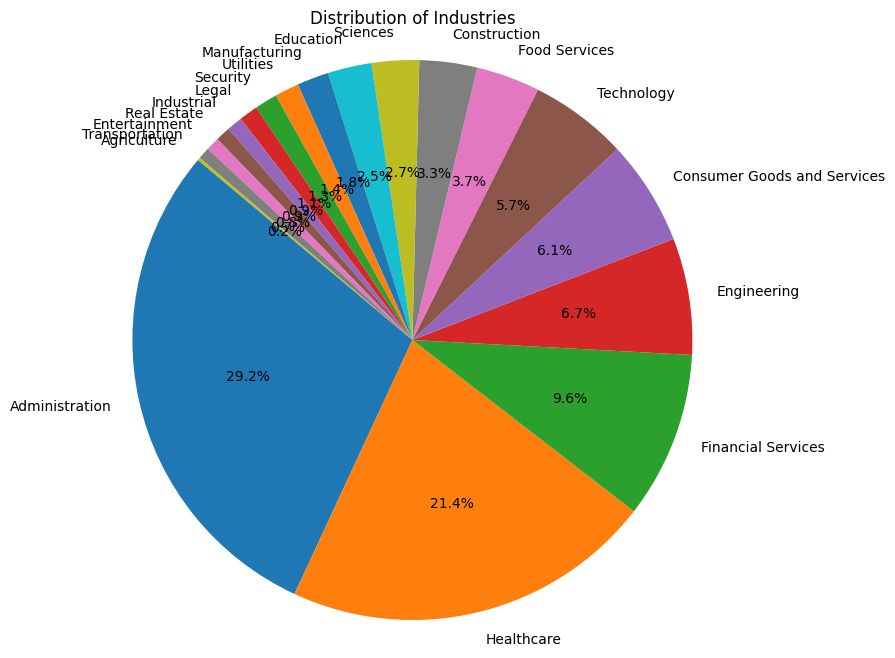

In [16]:
industry_counts = industries_df['industries'].explode().value_counts()

# pie chart
plt.figure(figsize=(10, 8))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Industries')
plt.axis('equal')  # Equal ensures pie is drawn as a circle.
plt.show()

---
<br><br>
## Top 10 Skills by Industry
---

In [17]:
top_skills_by_industry = get_top_skills(expanded_industries_df, skills=10,excluded_skills=excluded_skills)

In [18]:
pd.set_option('display.max_colwidth', None)


"""
use: Converts dictionary of top skills into a dataframe
returns: a dataframe with industries and top skills as comma separated strings
"""
def create_skills_df(top_skills_by_industry):
    # Creates a list of tuples for dataframe
    data = [(industry, ', '.join(skills)) for industry, skills in top_skills_by_industry.items()]
    # Creates dataframe
    df = pd.DataFrame(data, columns=['Industry', 'Top 10 Skills'])
    return df

industry_skills_df = create_skills_df(top_skills_by_industry)

display(industry_skills_df)

,Industry,Top 10 Skills
0,Administration,"sales, inventory management, data analysis, scheduling, bachelor's degree, budgeting, team management, coaching, conflict resolution, team leadership"
1,Agriculture,"sales, marketing, insurance, property and casualty license, life and health license, life insurance, selfmotivation, computer skills, auto insurance, home insurance"
2,Construction,"construction management, scheduling, quality control, budgeting, construction, safety, maintenance, engineering, plumbing, electrical"
3,Consumer Goods and Services,"sales, merchandising, inventory management, retail experience, high school diploma, cash handling, retail, retail management, barber license, scheduling"
4,Education,"teaching, research, curriculum development, classroom management, professional development, education, data analysis, bachelor's degree, early childhood education, lesson planning"
5,Engineering,"python, electrical engineering, mechanical engineering, autocad, civil engineering, engineering, java, aws, sql, data analysis"
6,Entertainment,"autocad, sales, graphic design, data analysis, revit, adobe creative suite, marketing, photoshop, bachelor's degree, presentation skills"
7,Financial Services,"sales, high school diploma, accounting, data analysis, bachelor's degree, account management, supervisory experience, negotiation, business development, marketing"
8,Food Services,"food preparation, food safety, sanitation, inventory management, restaurant management, scheduling, cooking, food handling, hospitality, kitchen management"
9,Healthcare,"patient care, nursing, registered nurse, documentation, bls, healthcare, patient education, acls, bls certification, medication administration"


---
<br><br>
## Apriori to Identify Frequent Item Sets
---

In [19]:
"""
use: Samples a fraction of the data
returns: a sampled dataframe
"""
def sample_data(df, fraction=0.1):  
    
    return df.sample(frac=fraction, random_state=1)


"""
use: Encodes a list of skills using the TransactionEncoder and converts it to a sparse dataframe
returns: a sparse dataframe of encoded skills
"""
def encode_data(skills_list):
    te = TransactionEncoder()
    te_ary = te.fit(skills_list).transform(skills_list)
    
    # converts to sparse dataframe after encoding for memory
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    return df.astype('Sparse[bool]')


"""
use: Applies the apriori algorithm to a dataframe to find frequent itemsets
returns: a dataframe containing frequent itemsets and support
"""
def apply_apriori(df, min_support=0.01):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    
    return frequent_itemsets


"""
use: Processes data to find frequent skill combinations in a specified industry
returns: a dataframe of sorted itemsets by the number of skills in each itemset
"""
def process_skill_combinations(data, industry, sample_size=0.2, min_support=0.05):  # Reduced sample size
    print("filtering data for the industry...")
    industry_data = data[data['industries'] == industry]
    
    print("sampling data")
    sampled_data = sample_data(industry_data, fraction=sample_size)
    
    print("preparing skills list")
    sampled_data['skills_list'] = sampled_data['skills_list'].apply(lambda x: x if isinstance(x, list) else x.split(', '))
    
    print("encoding data")
    encoded_df = encode_data(sampled_data['skills_list'])
    
    print("apriori")
    results = apply_apriori(encoded_df, min_support=min_support)
    
    print("sorting results")
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    results = results.sort_values(by='length', ascending=False)
    
    # clears memory
    del encoded_df
    gc.collect()
    
    print("top results...")
    print(results.head())
    
    return results

---
<br><br>
### Apply Apriori
---

In [20]:
result_itemsets = process_skill_combinations(expanded_industries_df, 'Technology')

filtering data for the industry...
sampling data
preparing skills list
encoding data
apriori
sorting results
top results...
     support                                   itemsets  length
67  0.107372                              (python, sql)       2
58  0.052456                       (communication, sql)       2
49  0.051424  (communication skills, analytical skills)       2
50  0.052694                                (java, aws)       2
52  0.065312             (collaboration, communication)       2


## Plot Frequent Skill Sets
---

filtering data for the industry...
sampling data
preparing skills list
encoding data
apriori
sorting results
top results...
      support                                         itemsets  length
193  0.045707                              (python, java, sql)       3
188  0.037454  (communication, problem solving, data analysis)       3
184  0.032693                        (aws, kubernetes, docker)       3
186  0.030313                                 (java, sql, aws)       3
187  0.036502                               (python, sql, aws)       3


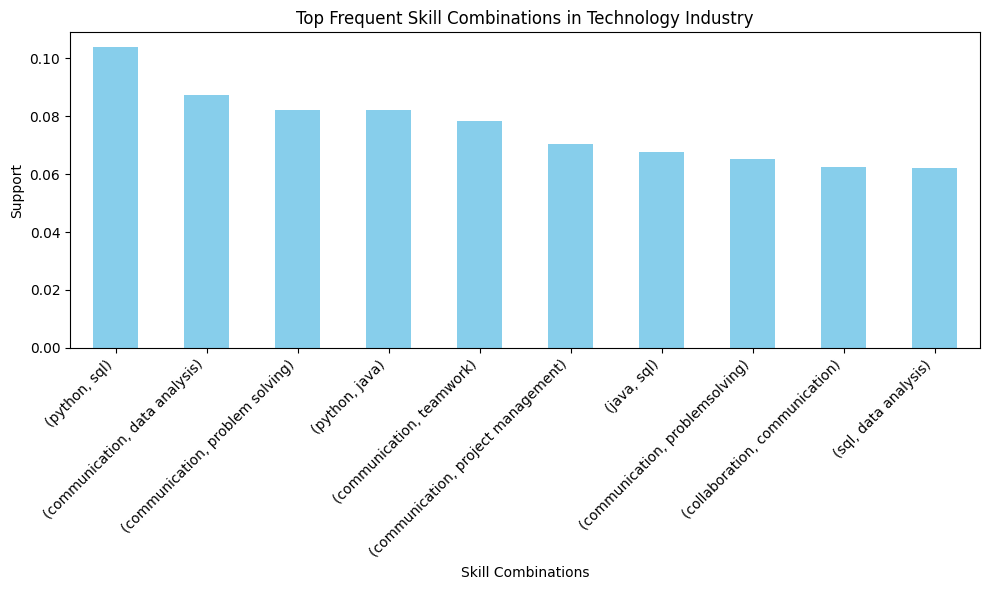

In [21]:
def plot_frequent_itemsets(results):
    # filters out itemsets with only one item
    filtered_results = results[results['itemsets'].apply(lambda x: len(x) > 1)]
    
    # Sorts results by support if not already sorted
    filtered_results = filtered_results.sort_values('support', ascending=False)
    
    # Plots top 10 frequent itemsets showing those with multiple items
    top_n = filtered_results.head(10)  
    top_n.plot(
        kind='bar', 
        x='itemsets', 
        y='support', 
        title='Top Frequent Skill Combinations in Technology Industry',
        legend=False,
        figsize=(10, 6),
        color='skyblue'
    )
    plt.ylabel('Support')
    plt.xlabel('Skill Combinations')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

result_itemsets = process_skill_combinations(expanded_industries_df, 'Technology', sample_size=0.1, min_support=0.03)
plot_frequent_itemsets(result_itemsets)

---
<br><br>

# 04/19-04/26 - National and State Level Geospatial Insights by Industry

**US Cities data set courtesy of:** https://simplemaps.com/data/us-cities.

---
<br><br>
## Industry-Wide Booms Across the US
---

In [22]:
us_cities_df = pd.read_csv('uscities.csv')
us_cities_df = us_cities_df[['city', 'state_id', 'lat', 'lng']]

In [23]:
def plot_industry_job_postings_US(industry_name, text_color='#FF0000', map_color='YlGn', dot_color='green', us_cities_df=us_cities_df):
    # Filters the dataframe to the specified industry
    industry_df = expanded_industries_df[expanded_industries_df['industries'] == industry_name]
    
    city_counts = industry_df['job_location'].value_counts().reset_index()
    city_counts.columns = ['City', 'Job_Postings']

    # geocode cities
    def geocode(city):
        filtered = us_cities_df[us_cities_df['city'].str.lower() == city.lower()]
        
        if not filtered.empty:
            return filtered.iloc[0]['lat'], filtered.iloc[0]['lng']
        else:
            return None, None

    # Filter for valid state id
    state_ids = set(us_cities_df['state_id'])
    # Extracts the city name from City which is structured like `New York, NY`
    city_counts['Processed_City'] = city_counts['City'].apply(lambda x: x.split(',')[0].strip())
    # Extracts state code
    city_counts['State_ID'] = city_counts['City'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else None)
    # Only accepts cities in the US
    city_counts = city_counts[city_counts['State_ID'].isin(state_ids)]

    # Geocodes cities
    coordinates = city_counts['Processed_City'].apply(geocode).tolist()
    city_counts[['lat', 'long']] = pd.DataFrame(coordinates, index=city_counts.index)

    # Drops where coordinates couldnt be found
    city_counts.dropna(subset=['lat', 'long'], inplace=True)

    # Filters coordinates for the bounds of the US
    city_counts = city_counts[(city_counts['lat'] >= 25.84) & (city_counts['lat'] <= 49.38) &
                              (city_counts['long'] >= -124.67) & (city_counts['long'] <= -66.95)]

    # Loads the US map shapefile
    us_map = gpd.read_file('./US_shape/States_shapefile.shp')
    # Extracts the number of job postings per state
    state_job_counts = city_counts.groupby('State_ID').agg({'Job_Postings': 'sum'}).reset_index()
    # Merges the map and job counts by state code
    us_map = us_map.merge(state_job_counts, how='left', left_on='State_Code', right_on='State_ID')

    fig, ax = plt.subplots(figsize=(15, 10))
    us_map.plot(ax=ax, column='Job_Postings', cmap=map_color, edgecolor='black', legend=True, legend_kwds={'label': "Number of Job Postings by State"})

    # Plots and annotates top cities
    added_label = False
    
    for idx, row in city_counts.iterrows():
        if not added_label:
            ax.scatter(row['long'], row['lat'], s=row['Job_Postings'] * 1, color=dot_color, label='Job Postings', alpha=0.5)
            added_label = True
        else:
            ax.scatter(row['long'], row['lat'], s=row['Job_Postings'] * 1, color=dot_color, alpha=0.5)

    top_cities = city_counts.sort_values(by='Job_Postings', ascending=False).head(10)
    
    for idx, row in top_cities.iterrows():
        ax.annotate(row['Processed_City'], (row['long'], row['lat']), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=24, color=text_color, fontweight='bold')

    ax.set_title(f'Job Posting Hotspots in the US ({industry_name} Industry)')
    if added_label:
        ax.legend()
        
    # Bounds of the US  
    ax.set_xlim([-124.67, -66.95])
    ax.set_ylim([25.84, 49.38])

    plt.show()

---

## Technology Industry Booms and Top 10 Cities Across the US
---

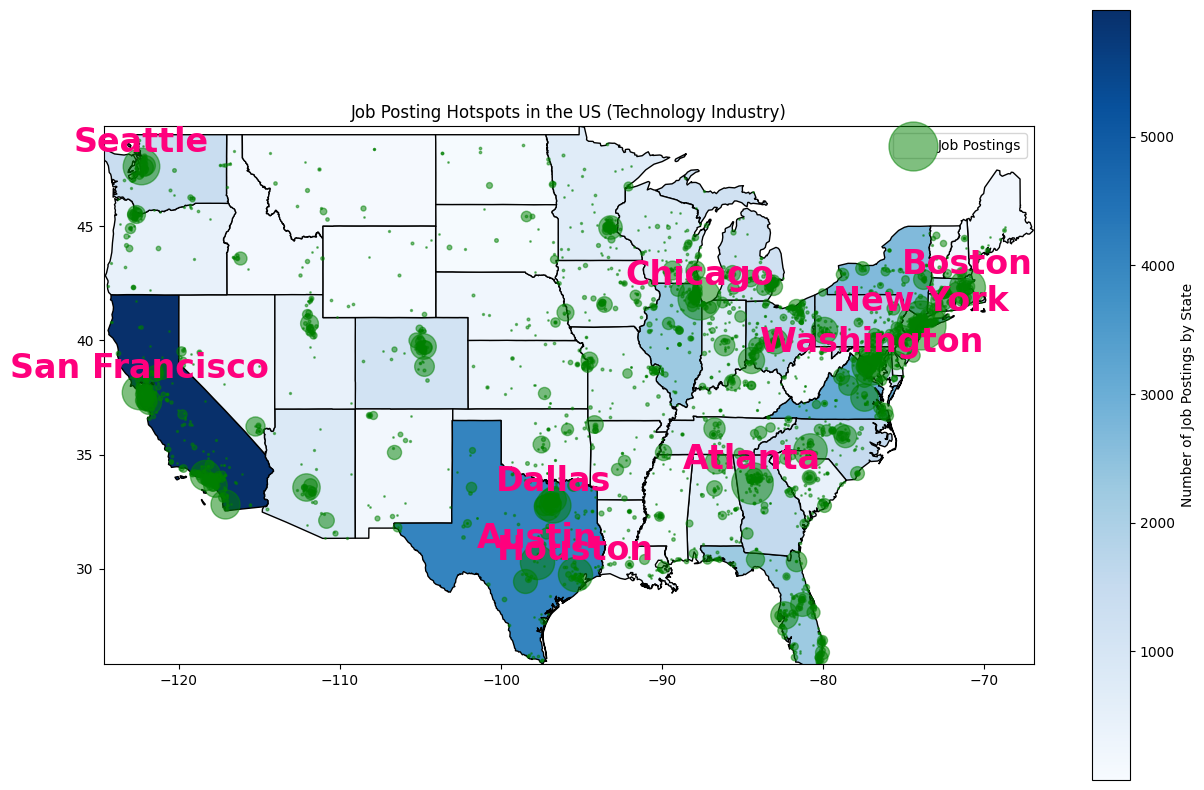

In [24]:
plot_industry_job_postings_US('Technology', '#FF007D', 'Blues')

---

## Healthcare Industry Booms and Top 10 Cities Across the US
---

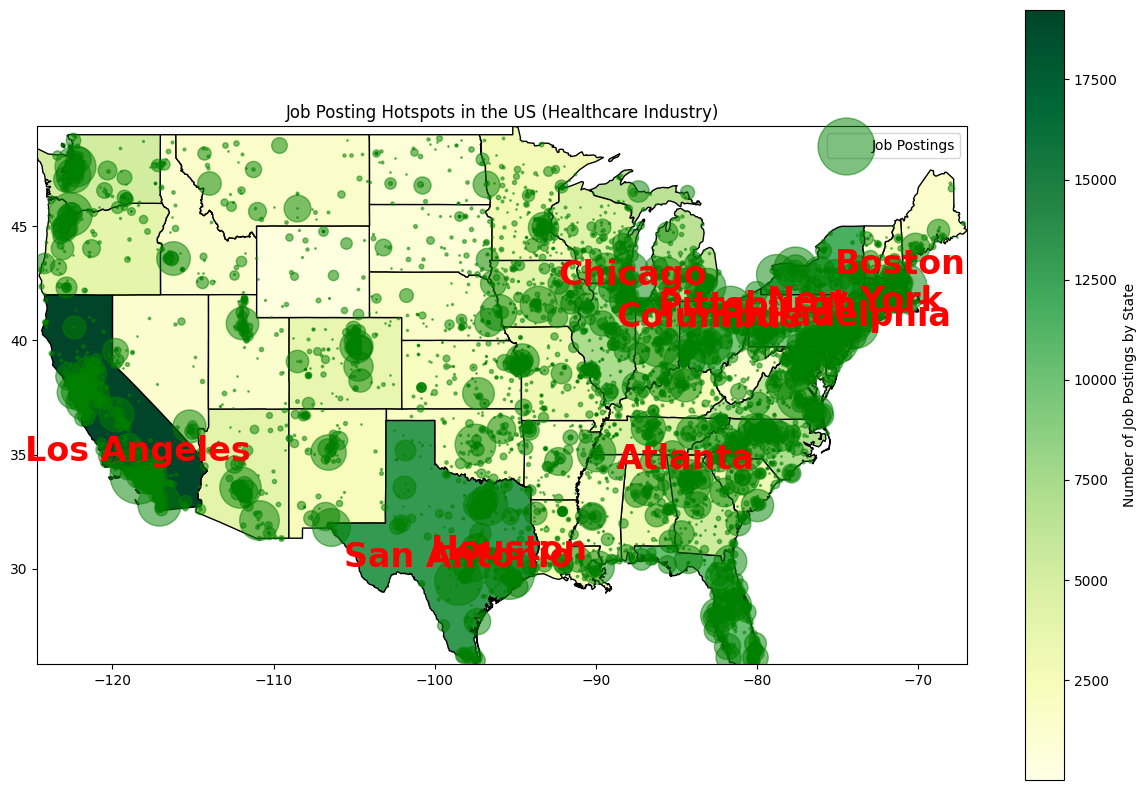

In [25]:
plot_industry_job_postings_US('Healthcare')

---

## Financial Services Industry Booms and Top 10 Cities Across the US
---

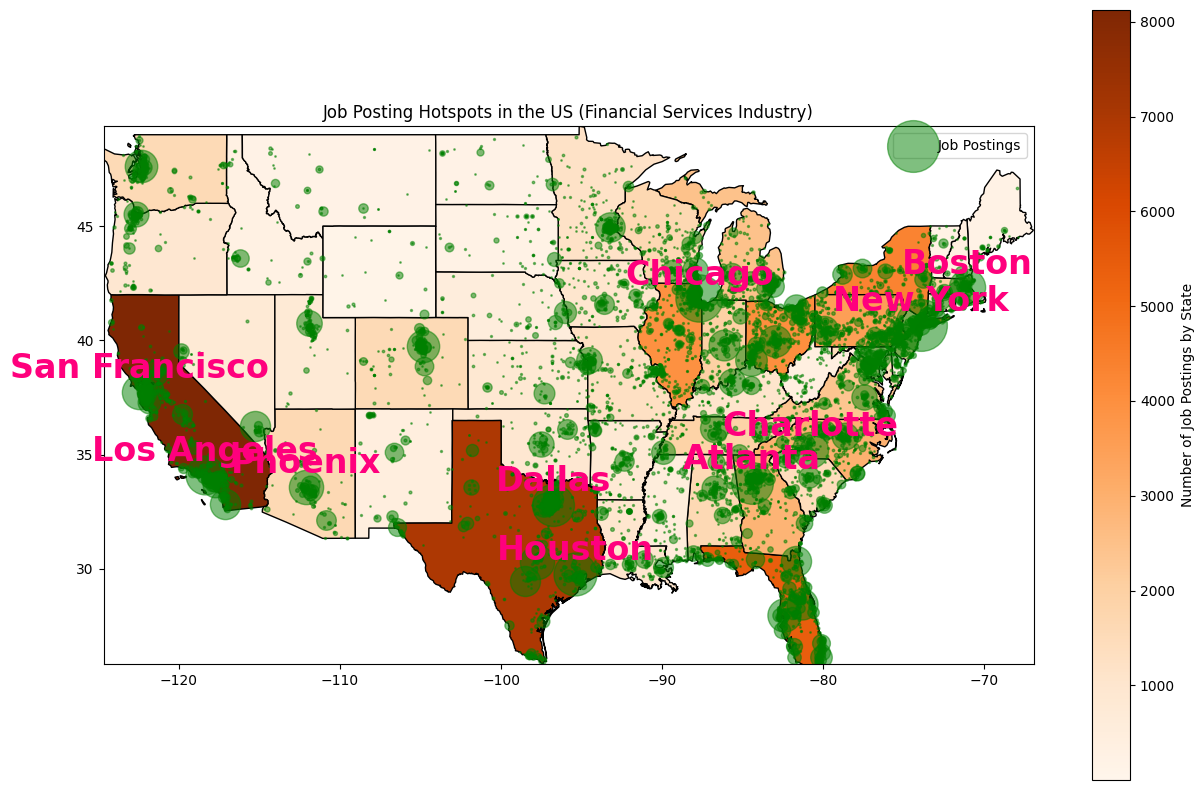

In [26]:
plot_industry_job_postings_US('Financial Services', '#FF007D', 'Oranges')

---
<br><br>
## Industry-Wide Booms by State
---

In [27]:
def plot_industry_job_postings_State(industry_name, state_code, text_color='#FF0000', map_color='YlGn', dot_color='green', us_cities_df=us_cities_df):
    # Filters the dataframe to the specified industry
    industry_df = expanded_industries_df[expanded_industries_df['industries'] == industry_name]
    city_counts = industry_df['job_location'].value_counts().reset_index()
    city_counts.columns = ['City', 'Job_Postings']

    # geocode cities
    def geocode(city):
        filtered = us_cities_df[us_cities_df['city'].str.lower() == city.lower()]
        if not filtered.empty:
            return filtered.iloc[0]['lat'], filtered.iloc[0]['lng']
        else:
            return None, None

    # Filters for valid state id
    state_ids = set(us_cities_df['state_id'])
    # Extracts the city name from City which is structured like `New York, NY`
    city_counts['Processed_City'] = city_counts['City'].apply(lambda x: x.split(',')[0].strip())
    # Extracts state code
    city_counts['State_ID'] = city_counts['City'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else None)
    # Only takes the cities in the US with the given state code
    city_counts = city_counts[(city_counts['State_ID'].isin(state_ids)) & (city_counts['State_ID'] == state_code)]

    # Geocodes cities
    coordinates = city_counts['Processed_City'].apply(geocode).tolist()
    city_counts[['lat', 'long']] = pd.DataFrame(coordinates, index=city_counts.index)

    # Drops where coordinates couldnt be found
    city_counts.dropna(subset=['lat', 'long'], inplace=True)

    # Loads the US map shapefile
    us_map = gpd.read_file('./US_shape/States_shapefile.shp')
    
    # Extracts the number of job postings per state
    state_job_counts = city_counts.groupby('State_ID').agg({'Job_Postings': 'sum'}).reset_index()
    # Merges the map and job counts by state code
    us_map = us_map.merge(state_job_counts, how='left', left_on='State_Code', right_on='State_ID')
    # Extracts the state bounds for the state using the shapefile
    state_bounds = us_map[us_map['State_Code'] == state_code].total_bounds

    fig, ax = plt.subplots(figsize=(15, 10))
    us_map.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot all states in light grey
    us_map[us_map['State_Code'] == state_code].plot(ax=ax, column='Job_Postings', cmap=map_color, edgecolor='black', legend=True, legend_kwds={'label': "Number of Job Postings by State"})

    # Plots cities as dots
    for idx, row in city_counts.iterrows():
        ax.scatter(row['long'], row['lat'], s=row['Job_Postings'] * 10, color=dot_color, alpha=0.5)

    # annotates top 5 cities
    top_cities = city_counts.sort_values(by='Job_Postings', ascending=False).head(5)
    for idx, row in top_cities.iterrows():
        ax.annotate(row['Processed_City'], (row['long'], row['lat']), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=24, color=text_color, fontweight='bold')

    # Sets title and adjust plot bounds to the state
    ax.set_title(f'Job Posting Hotspots in {state_code} ({industry_name} Industry)')
    ax.set_xlim([state_bounds[0], state_bounds[2]])
    ax.set_ylim([state_bounds[1], state_bounds[3]])

    plt.show()

---
## Technology Industry Bubbles in California
---

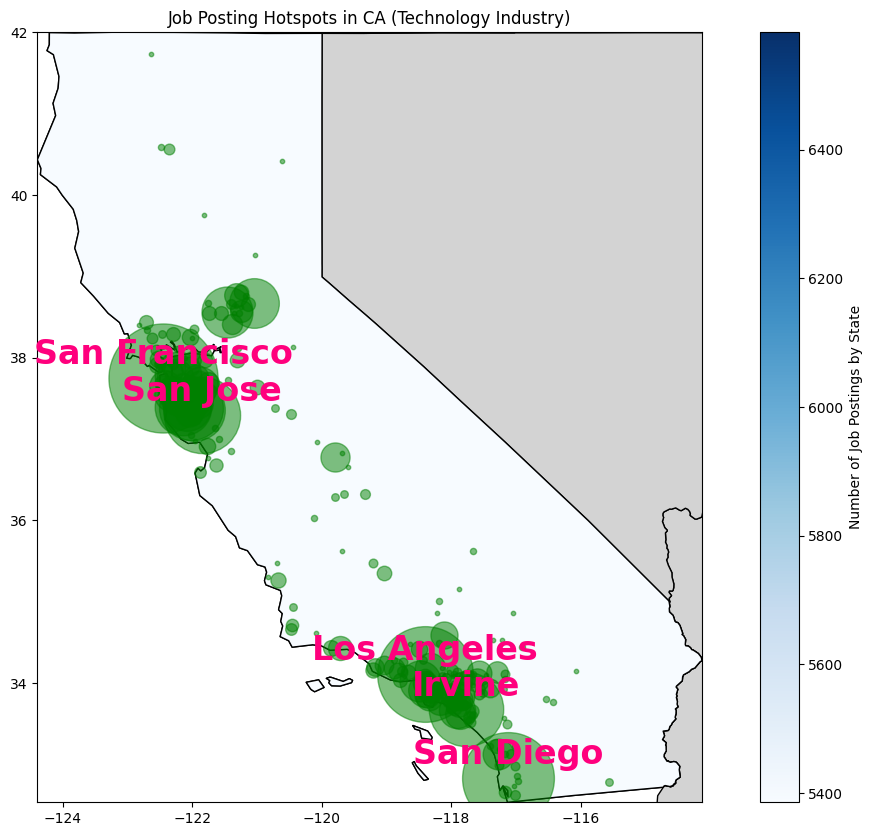

In [28]:
plot_industry_job_postings_State('Technology', 'CA','#FF007D', 'Blues')

---
## Healthcare Industry Bubbles in Colorado
---

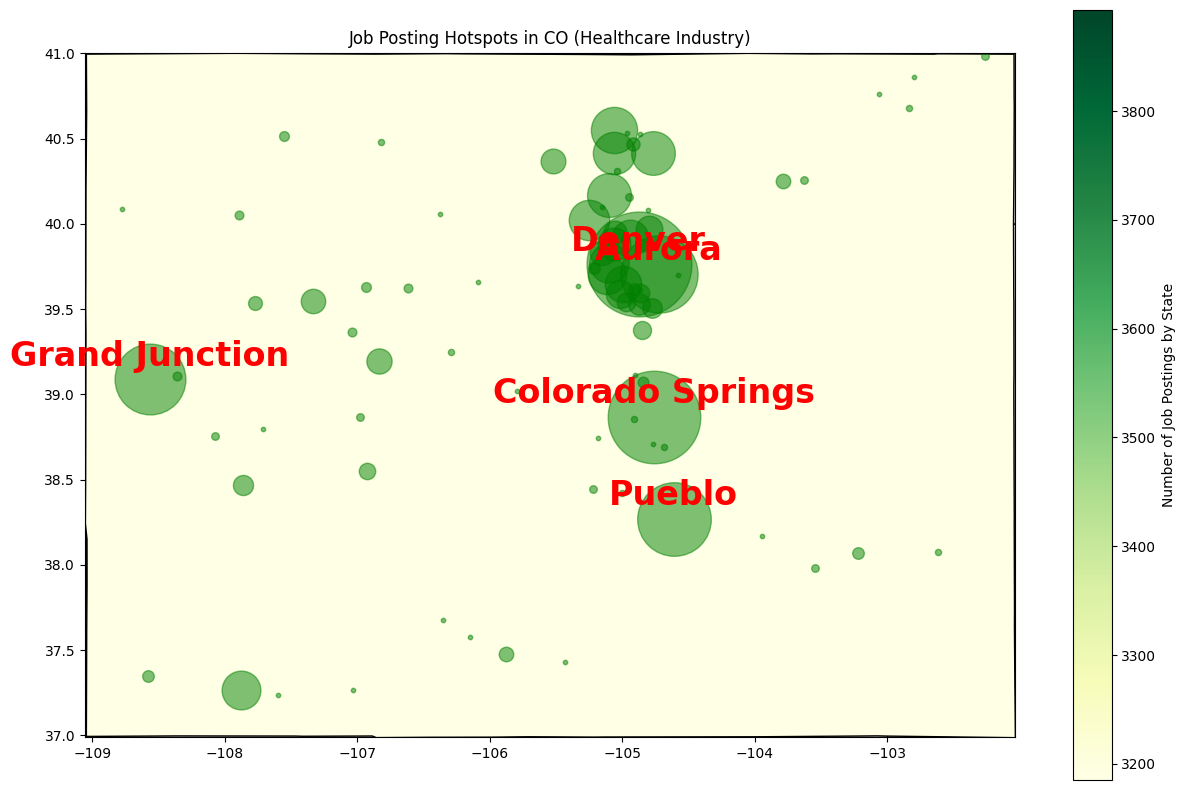

In [29]:
plot_industry_job_postings_State('Healthcare', 'CO')

---
## Financial Services Industry Bubbles in Texas
---

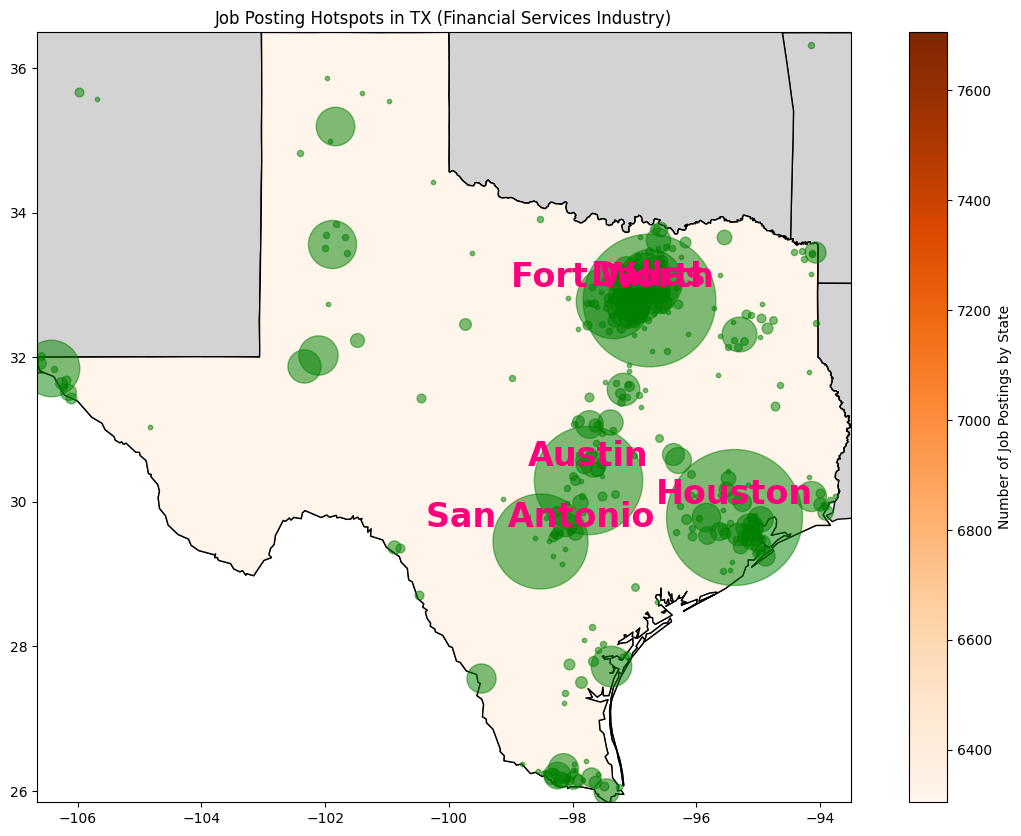

In [30]:
plot_industry_job_postings_State('Financial Services', 'TX','#FF007D', 'Oranges')